In [2]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Exploratory Data Analysis

The last notebook was responsible for downloading the [Kaggle's São Paulo House Price dataset](https://www.kaggle.com/datasets/ex0ticone/house-prices-of-sao-paulo-city), filter irrelevant data (rentals, outliers) and saving it to ".parquet", a more convenient file format.

In this notebook, we will perform an Exploratory Data Analysis (EDA) of our dataset. Our goal is to get a better understanding of the dataset and identify any patterns or correlations between the features and the target variable (the house price). We will use various visualization techniques and statistical methods to explore the data and gain insights.

## Dataset Loading

Lets load our already processed dataset and check it.

In [3]:
processed_dataset_root_dir = os.path.join(os.path.dirname(os.path.abspath("")), "data", "processed")

In [4]:
sp_house_price = pd.read_parquet(os.path.join(processed_dataset_root_dir, "sp_sales_data.parquet"))
sp_house_price

,bairro,tipo_imovel,area_util,banheiros,suites,quartos,vagas_garagem,anuncio_criado,preco_venda,taxa_condominio,iptu_ano
0,Jardim da Saude,Casa de dois andares,388.0,3.0,1.0,4.0,6.0,2017-02-07,700000,NaN,NaN
1,Vila Santa Teresa (Zona Sul),Casa,129.0,2.0,1.0,3.0,2.0,2016-03-21,336000,NaN,NaN
2,Vila Olimpia,Apartamento,80.0,2.0,1.0,3.0,2.0,2018-10-26,739643,686.0,1610.0
3,Pinheiros,Apartamento,94.0,1.0,0.0,3.0,2.0,2018-05-29,630700,1120.0,489.0
4,Vila Santa Clara,Condominio,110.0,1.0,1.0,3.0,2.0,2018-04-16,385000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
88742,Vila Carmosina,Apartamento,48.0,1.0,0.0,2.0,1.0,2017-10-07,171150,244.0,0.0
88743,Bela Vista,Apartamento,60.0,1.0,NaN,1.0,1.0,2017-12-13,251999,273.0,86.0
88744,Liberdade,Apartamento,53.0,2.0,1.0,2.0,1.0,2018-11-28,249782,210.0,0.0
88745,Vila Lageado,Apartamento,20.0,3.0,2.0,3.0,2.0,2019-02-06,623000,NaN,NaN


In [5]:

sp_house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88747 entries, 0 to 88746
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   bairro           88747 non-null  object        
 1   tipo_imovel      88747 non-null  object        
 2   area_util        87125 non-null  float64       
 3   banheiros        88742 non-null  float64       
 4   suites           80885 non-null  float64       
 5   quartos          88744 non-null  float64       
 6   vagas_garagem    87110 non-null  float64       
 7   anuncio_criado   88747 non-null  datetime64[ns]
 8   preco_venda      88747 non-null  int64         
 9   taxa_condominio  78203 non-null  float64       
 10  iptu_ano         73429 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(2)
memory usage: 7.4+ MB


Our dataset now has 89441 entries and 10 features, including the target feature `preco_venda`. For the feature type we have `bairro` and `tipo_movel` as *objects*, `anuncio_criado` as *datetime*, `preco_venda` as an *integer* and the remaining features as *floats*, but don't let these types misguide you.

First of all, as it's own name sugests, `preco_venda` is in *monetary units* (**Reais** in this case), so it would be wise to consider those values as *floats*, and the decimal places would account for **cents**.

`banheiros`, `suites`, `quartos` and `vagas_garagem` as *floats* doesn't sounds good too. e.g.: 0.75 bathroom doesn't make sense. It's more likely that these features were considered *floats* by Pandas by the occurences of *missing values* in them, as these are represented by `nan` (a float value).

Speaking of *missing values*, they occur in some features. Let's how the features are affected by this.

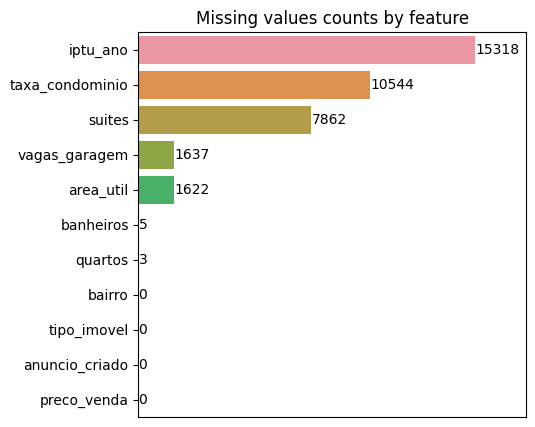

In [6]:
na_counts = sp_house_price.isna().sum(axis="rows").sort_values(ascending=False)

_, ax = plt.subplots(figsize=(5, 5))
sns.barplot(x=na_counts, y=na_counts.index, ax=ax)

for p in ax.patches:
    x = p.get_x()
    y = p.get_y()
    width = p.get_width()
    height = p.get_height()
    ax.annotate(f"{int(width)}", (width + x, y + height * 0.65), ha="left")

ax.set_xlim([0, int(1.15 * na_counts.values[0])])
ax.axes.get_xaxis().set_visible(False)
ax.set_title("Missing values counts by feature");

`iptu_ano` is the feature with most *missing values*, followed by `taxa_condominio` and `suites`. Some of those missing values seems to be erros, as the lack of values would not make sense for `area_util`, `banheiros` and `quartos`. We'll deal with those values after our analysis, that will bring us some insights on how to handle them.

# General Dataset Overview

Let's take a look on some statistics of the dataset's numerical features.

In [7]:
sp_house_price.describe()

,area_util,banheiros,suites,quartos,vagas_garagem,preco_venda,taxa_condominio,iptu_ano
count,87125.000000,88742.000000,80885.000000,88744.000000,87110.000000,8.874700e+04,7.820300e+04,7.342900e+04
mean,113.392562,2.200086,1.062818,2.538267,1.834049,5.483481e+05,9.878045e+02,7.340850e+02
std,68.613846,1.309771,0.986569,0.814964,1.158817,3.735593e+05,2.623275e+04,5.012955e+04
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.050000e+04,0.000000e+00,0.000000e+00
25%,62.000000,1.000000,0.000000,2.000000,1.000000,2.800000e+05,0.000000e+00,0.000000e+00
50%,93.000000,2.000000,1.000000,3.000000,2.000000,4.315500e+05,3.500000e+02,3.700000e+01
75%,149.000000,3.000000,1.000000,3.000000,2.000000,6.805750e+05,6.720000e+02,2.100000e+02
max,397.000000,7.000000,6.000000,5.000000,7.000000,1.931999e+06,4.059999e+06,1.036700e+07


We can see that `banheiros`, `suites`, `quartos` and `vagas_garagem` have indeed low values, so they may be categorical features.

We can also note that `taxa_condominio` and `iptu_ano` have at least 25% of their data set to zero, which is not consistent with their definition. We'll devise an approach to handle this problem later in this notebook.

Now let's take a look at the non-numeric features.

In [8]:
sp_house_price.describe(include="O")

,bairro,tipo_imovel
count,88747,88747
unique,1426,8
top,Santana,Apartamento
freq,2168,59559


`bairro` and `tipo_imovel` are provided in full for this dataset. While `tipo_imovel` has only 8 unique values, possibly representing categories, `bairro` has 1426 values, so this features has a high cardinality.

# Univariate Analysis

Now we'll conduct our analysis by checking each features individually, starting with our target feature.

## preco_venda

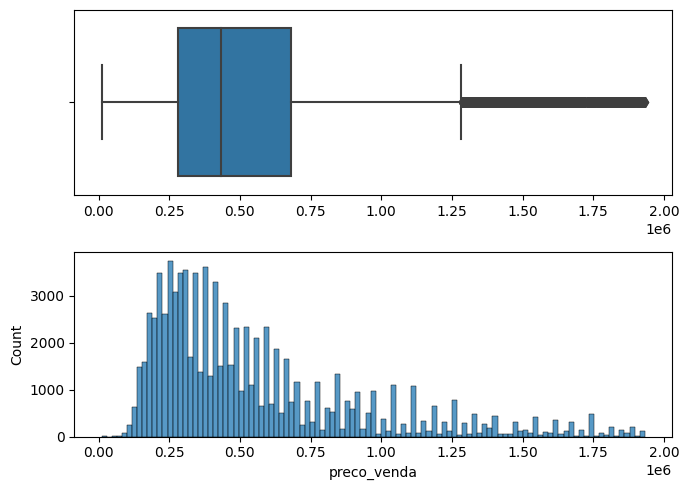

In [9]:
_, (ax1, ax2) = plt.subplots(nrows=2, figsize=(7, 5))
sns.boxplot(x="preco_venda", data=sp_house_price, ax=ax1);
ax1.set_xlabel("")
sns.histplot(x="preco_venda", data=sp_house_price, ax=ax2);

plt.tight_layout()

House Prices ranges from R$10.500,00 to R$1.931.999,00, with average price of R$548.348,00. 50% of the prices are concentrated in range between R$280.000,00 and R$680.575,00. We also have positive skewness, as we can see by the long right tail of the distribution, indicating that we have some high valued **outliers**.

## bairro

`bairro` relates to the naighborhood of the house. In general, due to proximity to interesting places (e.g.: comercial centers, schools, parks, beachs, etc.) and neighborhood development, house prices vary for one neighborhood to another.

Let's take a look to the top-30 neighboors with houses and the least-30 with less houses for sale.

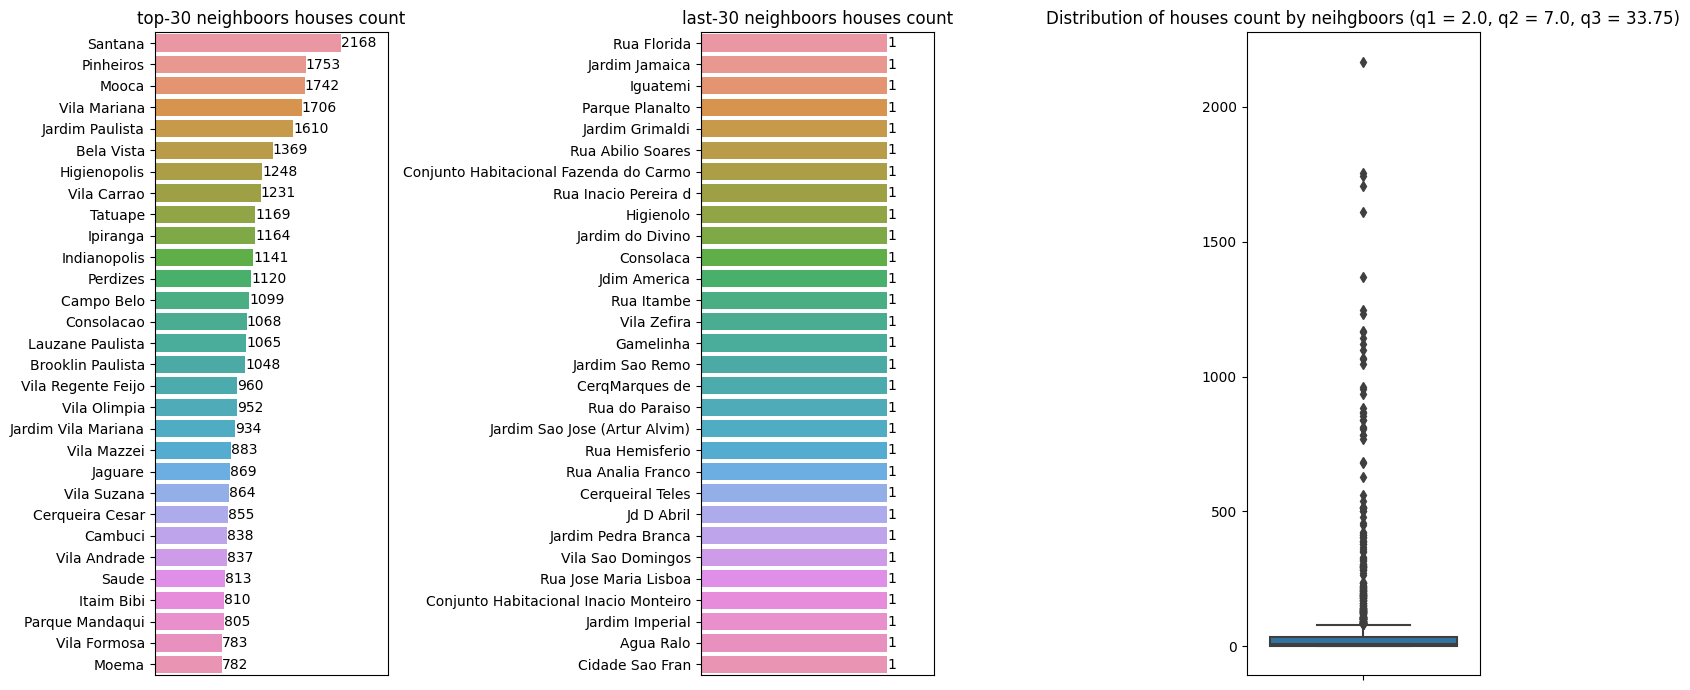

In [11]:
neighs_counts = sp_house_price.bairro.value_counts()

top_30_neighs = neighs_counts.head(30)
last_30_neighs = neighs_counts.tail(30)

titles = ("top-30 neighboors houses count", "last-30 neighboors houses count")

_, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15, 7))

for title, ax, neighs in zip(titles, (ax1, ax2), (top_30_neighs, last_30_neighs)):
    
    sns.barplot(x=neighs, y=neighs.index, ax=ax)

    for p in ax.patches:
        x = p.get_x()
        y = p.get_y()
        width = p.get_width()
        height = p.get_height()
        ax.annotate(f"{int(width)}", (width + x, y + height * 0.75), ha="left")

    ax.set_xlim([0, 1.25 * neighs.values[0]])
    ax.axes.get_xaxis().set_visible(False)
    ax.set_title(title);

sns.boxplot(y=neighs_counts, ax=ax3)
ax3.set_ylabel("")

(q1, q2, q3) = neighs_counts.quantile([0.25, 0.5, 0.75])
ax3.set_title(f"Distribution of houses count by neihgboors (q1 = {q1}, q2 = {q2}, q3 = {q3})");

plt.tight_layout()

With 2168, `Santana` is the neighboor with most houses for sale in the dataset. We can also see that this neighboorhood is considered as an exceptional case, as most of the neighboors have between 2 to 34 houses for sale.